<a href="https://colab.research.google.com/github/rjromo/dinamica_procesos/blob/main/Romo_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##RUBÉN ROMO
###LINEALIZACIÓN 

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

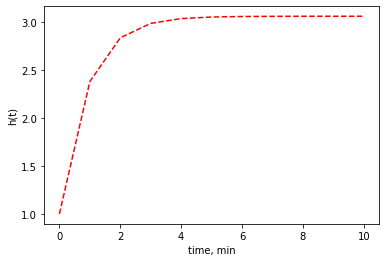

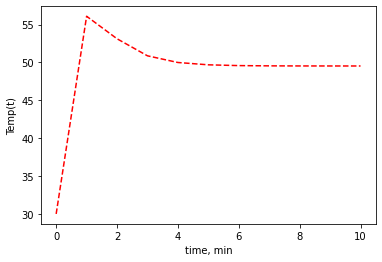

In [67]:

def mezctank(x,t):
    # 1-2 variables de desviacion
    h_desv=x[0]
    T_desv=x[1]
    
    
    #estado estacionario
    h0 = 1
    Temp0 = 30
    qc0=1.26491
    qf0=3.16228
    
    #constantes 
    A=1
    At=2
    g=9.81
    Tf=50
    Tc=80
    qf = 5
    qc = 4
    
    # 3-4 variables de desviacion
    qf_desv = qf-qf0
    qc_desv = qc-qc0
    
    #expresiones de k
    k11 = (-A*(np.sqrt(2*g)))/float(2*At*np.sqrt(h0))
    k12 = 0
    k13 = 1/At
    k14 = 1/At
    
    q1 = qc0*(Tc-Temp0)
    q2 = qf0*(Tf-Temp0)
    k21= ((-1)*(q1+q2))/float(At*(h0^2))
    k22= (-qc0-qf0)/float(At*h0)
    k23= (Tf-Temp0)/float(At*h0)
    k24= (Tc-Temp0)/float(At*h0)
    
    dh_desvdt= k11*h_desv + k12*T_desv + k13*qf_desv + k14*qc_desv
    dT_desvdt= k21*h_desv + k22*T_desv + k23*qf_desv + k24*qc_desv
    
    return [dh_desvdt,  dT_desvdt]


#Graficas 
t=np.linspace(0,10,11)

hi=0
Tempi=0
xi=[hi, Tempi]
h0 = 1
Temp0 = 30
y= odeint(mezctank, xi, t)


plt.plot(t,y[:,0]+h0,"r--")
plt.xlabel("time, min")
plt.ylabel("h(t)")
plt.show()

plt.plot(t,y[:,1]+Temp0,"r--")
plt.xlabel("time, min")
plt.ylabel("Temp(t)")
plt.show()